In [ ]:
%matplotlib inline

##### The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing.
##### When we load the dataset below, X_train and X_test will contain the images, and y_train and y_test will contain the digits that those images represent.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


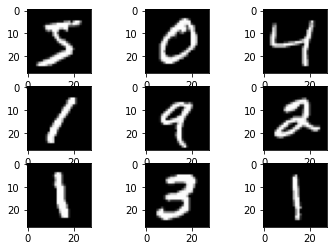

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# Check first four digit. We will validate our model on first four digit

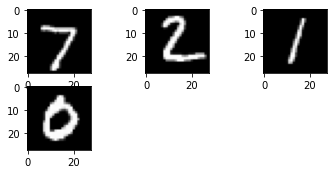

In [ ]:
for i in range(4):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

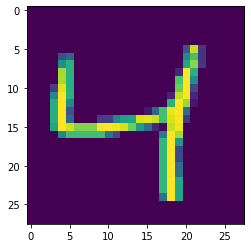

In [ ]:
#plot the first image in the dataset
plt.imshow(X_train[2])

In [ ]:
#check image shape
X_train[0].shape

(28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Normalize the Images

# convert from integers to floats
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

X_train = train_norm
X_test = test_norm

In [ ]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                46090     
Total params: 55,658
Trainable params: 55,658
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train model
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0408 - val_accuracy: 0.9879
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0222 - accuracy: 0.9935 - val_loss: 0.0438 - val_accuracy: 0.9862
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0455 - val_accuracy: 0.9863


In [ ]:
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
print("The accuracy of the model is: ", acc * 100)

The accuracy of the model is:  98.6299991607666


In [ ]:
scores, histories = list(), list()
scores.append(acc)
histories.append(history)

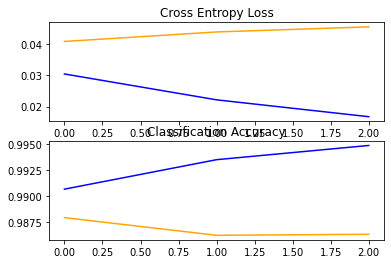

In [ ]:
for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

In [ ]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

IndentationError: ignored

In [ ]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

array([[5.7466769e-07, 4.0160713e-13, 1.0894856e-05, 2.8913794e-04,
        3.0351784e-11, 2.3836672e-10, 1.0243566e-13, 9.9969923e-01,
        2.2057276e-07, 2.4452005e-08],
       [5.6693770e-09, 3.1732009e-07, 9.9999928e-01, 4.3092499e-10,
        1.7152661e-13, 1.2010233e-14, 3.5545958e-07, 3.1351638e-13,
        3.6279024e-09, 6.5175814e-15],
       [2.2919292e-05, 9.9613488e-01, 2.7035894e-03, 2.9223905e-08,
        1.0602733e-03, 2.5785888e-05, 2.5497714e-08, 3.1618099e-05,
        2.0823860e-05, 5.3934713e-08],
       [9.9999344e-01, 1.7458710e-12, 3.4037257e-06, 4.6778818e-12,
        4.5224371e-12, 2.2078404e-10, 1.0405536e-06, 2.6243697e-08,
        6.4162762e-08, 1.9497379e-06]], dtype=float32)

In [ ]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

It have correctly Identified first 4 digit as 7,2,1,0